# Откроем контуры

In [ ]:
path = '/content/drive/MyDrive/Stones/URFU/Data/train/_annotations.coco.json'

import json

# Загрузка файла с аннотациями
with open(path, 'r') as f:
    coco_annotations = json.load(f)

# Пример вывода информации
print("Количество изображений:", len(coco_annotations['images']))
print("Количество аннотаций:", len(coco_annotations['annotations']))
print("Количество категорий:", len(coco_annotations['categories']))

# Пример доступа к первой аннотации
first_annotation = coco_annotations['annotations'][0]
print("Первая аннотация:", first_annotation)

Количество изображений: 100
Количество аннотаций: 1275
Количество категорий: 2
Первая аннотация: {'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [79, 0, 186.25, 178.77], 'area': 33295.825, 'segmentation': [[86.875, 0, 85.625, 1.582, 83.125, 1.582, 78.75, 7.119, 80, 13.447, 83.75, 19.775, 93.75, 45.088, 93.75, 51.416, 95, 52.998, 95, 56.162, 98.75, 65.654, 98.75, 73.564, 103.75, 84.639, 103.75, 87.803, 110, 103.623, 113.75, 108.369, 120, 122.607, 120, 127.354, 121.25, 128.936, 121.25, 136.846, 122.5, 138.428, 122.5, 146.338, 123.75, 147.92, 123.75, 155.83, 125, 157.412, 125, 163.74, 127.5, 168.486, 127.5, 171.65, 128.75, 174.814, 133.125, 178.77, 145, 177.979, 158.125, 177.188, 168.125, 167.695, 171.875, 167.695, 181.875, 161.367, 185.625, 156.621, 186.875, 156.621, 190.625, 151.875, 191.875, 151.875, 195.625, 147.129, 196.875, 147.129, 201.875, 140.801, 209.375, 136.055, 216.875, 126.563, 221.875, 123.398, 226.25, 117.861, 226.25, 116.279, 232.5, 106.787, 232.5, 105.205, 244.375, 90

In [ ]:
import json

def load_coco_annotations(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_contours(coco_annotations):
    contours = []
    for annotation in coco_annotations['annotations']:
        if annotation['iscrowd'] == 0:  # исключаем сегментации, которые являются толпой
            contours.append(annotation['segmentation'])
    return contours

def main():
    # Укажите путь к вашему файлу с аннотациями COCO
    file_path = path

    # Загрузка аннотаций COCO
    coco_annotations = load_coco_annotations(file_path)

    # Извлечение контуров
    contours = extract_contours(coco_annotations)

    # Пример вывода количества извлеченных контуров
    print("Количество извлеченных контуров:", len(contours))

    # Пример вывода первого контура
    if contours:
        print("Первый контур:", contours[0])

if __name__ == "__main__":
    main()

Количество извлеченных контуров: 1275
Первый контур: [[86.875, 0, 85.625, 1.582, 83.125, 1.582, 78.75, 7.119, 80, 13.447, 83.75, 19.775, 93.75, 45.088, 93.75, 51.416, 95, 52.998, 95, 56.162, 98.75, 65.654, 98.75, 73.564, 103.75, 84.639, 103.75, 87.803, 110, 103.623, 113.75, 108.369, 120, 122.607, 120, 127.354, 121.25, 128.936, 121.25, 136.846, 122.5, 138.428, 122.5, 146.338, 123.75, 147.92, 123.75, 155.83, 125, 157.412, 125, 163.74, 127.5, 168.486, 127.5, 171.65, 128.75, 174.814, 133.125, 178.77, 145, 177.979, 158.125, 177.188, 168.125, 167.695, 171.875, 167.695, 181.875, 161.367, 185.625, 156.621, 186.875, 156.621, 190.625, 151.875, 191.875, 151.875, 195.625, 147.129, 196.875, 147.129, 201.875, 140.801, 209.375, 136.055, 216.875, 126.563, 221.875, 123.398, 226.25, 117.861, 226.25, 116.279, 232.5, 106.787, 232.5, 105.205, 244.375, 90.176, 245.625, 90.176, 255, 81.475, 256.25, 75.146, 257.5, 73.564, 257.5, 49.834, 258.75, 48.252, 258.75, 40.342, 261.25, 34.014, 261.25, 21.357, 265, 13.4

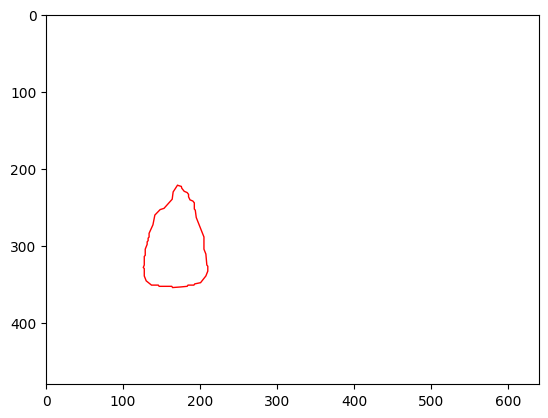

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_coco_annotations(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_contours(coco_annotations):
    contours = []
    for annotation in coco_annotations['annotations']:
        if annotation['iscrowd'] == 0:  # исключаем сегментации, которые являются толпой
            contours.append(annotation['segmentation'])
    return contours

def visualize_contour(contour):
    fig, ax = plt.subplots()

    # Нарисуем контур
    for segment in contour:
        # Преобразование списка координат в формат, подходящий для patches.Polygon
        segment = [(segment[i], segment[i + 1]) for i in range(0, len(segment), 2)]
        poly = patches.Polygon(segment, closed=True, fill=False, edgecolor='r')
        ax.add_patch(poly)

    ax.set_xlim(0, 640)  # Установите нужный вам диапазон осей
    ax.set_ylim(0, 480)  # Установите нужный вам диапазон осей
    ax.set_aspect('equal', 'box')
    plt.gca().invert_yaxis()  # Инвертируем ось Y для правильного отображения
    plt.show()

def main():
    # Укажите путь к вашему файлу с аннотациями COCO
    file_path = path

    # Загрузка аннотаций COCO
    coco_annotations = load_coco_annotations(file_path)

    # Извлечение контуров
    contours = extract_contours(coco_annotations)

    # Пример визуализации первого контура
    if contours:
        visualize_contour(contours[4])

if __name__ == "__main__":
    main()

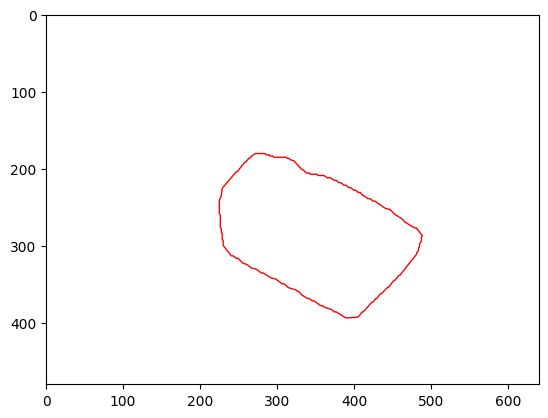

Контур успешно визуализирован.


In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_coco_annotations(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_contours(coco_annotations):
    contours = []
    for annotation in coco_annotations['annotations']:
        if annotation['iscrowd'] == 0:  # исключаем сегментации, которые являются толпой
            contours.append(annotation['segmentation'])
    return contours

def is_contour_within_bounds(contour, image_width, image_height):
    for segment in contour:
        for i in range(0, len(segment), 2):
            x, y = segment[i], segment[i + 1]
            if x <= 0 or x >= image_width or y <= 0 or y >= image_height:
                return False
    return True

def visualize_contour(contour, image_width=640, image_height=480):
    if not is_contour_within_bounds(contour, image_width, image_height):
        return False

    fig, ax = plt.subplots()

    for segment in contour:
        segment = [(segment[i], segment[i + 1]) for i in range(0, len(segment), 2)]
        poly = patches.Polygon(segment, closed=True, fill=False, edgecolor='r')
        ax.add_patch(poly)

    ax.set_xlim(0, image_width)
    ax.set_ylim(0, image_height)
    ax.set_aspect('equal', 'box')
    plt.gca().invert_yaxis()
    plt.show()
    return True

def main():
    # Укажите путь к вашему файлу с аннотациями COCO
    file_path = path

    # Загрузка аннотаций COCO
    coco_annotations = load_coco_annotations(file_path)

    # Извлечение контуров
    contours = extract_contours(coco_annotations)

    # Пример визуализации первого контура
    if contours:
        result = visualize_contour(contours[18])
        if result:
            print("Контур успешно визуализирован.")
        else:
            print("Контур касается границ изображения и не был визуализирован.")

if __name__ == "__main__":
    main()

# Фильтруем те контуры, которые заходят за границы изображения

In [ ]:
import json

def load_coco_annotations(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def extract_contours(coco_annotations):
    contours = []
    for annotation in coco_annotations['annotations']:
        if annotation['iscrowd'] == 0:  # исключаем сегментации, которые являются толпой
            contours.append(annotation['segmentation'])
    return contours

def is_contour_within_bounds(contour, image_width, image_height):
    for segment in contour:
        for i in range(0, len(segment), 2):
            x, y = segment[i], segment[i + 1]
            if x <= 0 or x >= image_width or y <= 0 or y >= image_height:
                return False
    return True

def filter_contours_within_bounds(coco_annotations, image_width=640, image_height=480):
    valid_contours = []
    for annotation in coco_annotations['annotations']:
        if annotation['iscrowd'] == 0:  # исключаем сегментации, которые являются толпой
            contour = annotation['segmentation']
            if is_contour_within_bounds(contour, image_width, image_height):
                valid_contours.append(contour)
    return valid_contours

def main():
    # Укажите путь к вашему файлу с аннотациями COCO
    file_path = path

    # Загрузка аннотаций COCO
    coco_annotations = load_coco_annotations(file_path)

    # Фильтрация контуров, которые не касаются границ изображения
    valid_contours = filter_contours_within_bounds(coco_annotations)

    # Пример вывода количества валидных контуров
    print("Количество контуров, не касающихся границ изображения:", len(valid_contours))

    # Пример вывода первых нескольких валидных контуров
    for i, contour in enumerate(valid_contours[:5]):
        print(f"Контур {i + 1}:", contour)

    print(valid_contours)

    import pickle
    with open('/content/drive/MyDrive/Stones/URFU/Эталоны/standard.pkl', 'wb') as f:
      pickle.dump(mylist, f)

if __name__ == "__main__":
    main()

Количество контуров, не касающихся границ изображения: 465
Контур 1: [[126.875, 265.781, 154.375, 248.379, 162.5, 239.678, 162.5, 236.514, 163.75, 234.932, 163.75, 227.021, 165, 225.439, 165, 219.111, 166.25, 215.947, 162.5, 206.455, 160, 193.799, 157.5, 190.635, 157.5, 185.889, 154.375, 181.934, 150.625, 181.934, 149.375, 180.352, 140.625, 180.352, 139.375, 181.934, 134.375, 181.934, 133.125, 180.352, 121.875, 180.352, 120.625, 181.934, 118.125, 181.934, 113.125, 185.098, 108.125, 185.098, 106.875, 183.516, 103.125, 183.516, 101.875, 185.098, 99.375, 185.098, 94.375, 188.262, 83.125, 188.262, 81.875, 189.844, 79.375, 189.844, 78.125, 191.426, 73.125, 193.008, 63.75, 206.455, 61.25, 212.783, 61.25, 217.529, 60, 219.111, 60, 225.439, 58.75, 227.021, 58.75, 230.186, 52.5, 246.006, 52.5, 252.334, 53.75, 255.498, 58.125, 259.453, 65.625, 259.453, 66.875, 261.035, 73.125, 262.617, 78.125, 267.363, 83.125, 268.945, 84.375, 270.527, 93.125, 270.527, 94.375, 272.109, 104.375, 272.109, 105.625,